#Compare Predictions for the Different Corpora

Corpora:
* Corpus Big
* Annotation
* Ceneton
* EDBO

Wat willen we vergelijken?
* Aantal zinnen waarvoor tenminste 1 label is voorspeld
* Aantallen voor de verschillende labels

We gaan ervanuit dat die ongeveer gelijk verdeeld zijn

Wat ik verder nog wil
* Verloop over de jaren per emotielabel
* Verloop over de jaren per periode

In [12]:
# Render our plots inline
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (16, 6)

In [13]:
# load data
def load_data(corpus, column_names, corpus_metadata, label_counts, body_parts, emotion_bodypart_pairs):
    c = pd.read_csv(corpus, header=None, sep='\t', index_col=0, names=column_names)
    md = pd.read_csv(corpus_metadata, index_col=0)
    l = pd.read_csv(label_counts, index_col=0)
    bp = pd.read_csv(body_parts, index_col=0)
    ebp = pd.read_csv(emotion_bodypart_pairs, index_col=0)
    return pd.concat([c, md, l, bp, ebp], axis=1)

corpus_big = load_data('/home/jvdzwaan/data/embem/corpus/corpus_big.csv', ['id', 'year', 'genre', 'title', 'authors'],
                       '/home/jvdzwaan/data/embem/dict/corpus_big_additional_metadata.csv', 
                       '/home/jvdzwaan/data/embem/dict/corpus_big_label_counts.csv',
                       '/home/jvdzwaan/data/embem/dict/corpus_big_heem_expanded_body_parts.csv',
                       '/home/jvdzwaan/data/embem/dict/corpus_big_emotion_bodypart_pairs.csv')
annotation = load_data('/home/jvdzwaan/data/embem/corpus/annotation_corpus.csv', ['id', 'year', 'genre', 'title', 'authors'],
                       '/home/jvdzwaan/data/embem/dict/annotation_additional_metadata.csv', 
                       '/home/jvdzwaan/data/embem/dict/annotation_label_counts.csv',
                       '/home/jvdzwaan/data/embem/dict/annotation_heem_expanded_body_parts.csv',
                       '/home/jvdzwaan/data/embem/dict/annotation_emotion_bodypart_pairs.csv')
ceneton = load_data('/home/jvdzwaan/data/embem/corpus/ceneton.csv', ['id', 'year', 'genre', 'title', 'authors'],
                    '/home/jvdzwaan/data/embem/dict/ceneton_additional_metadata.csv',
                    '/home/jvdzwaan/data/embem/dict/ceneton_label_counts.csv',
                    '/home/jvdzwaan/data/embem/dict/ceneton_heem_expanded_body_parts.csv',
                    '/home/jvdzwaan/data/embem/dict/ceneton_emotion_bodypart_pairs.csv')
edbo = load_data('/home/jvdzwaan/data/embem/corpus/edbo.csv', ['id', 'year', 'genre', 'title+author'],
                 '/home/jvdzwaan/data/embem/dict/edbo_additional_metadata.csv',
                 '/home/jvdzwaan/data/embem/dict/edbo_label_counts.csv',
                 '/home/jvdzwaan/data/embem/dict/edbo_heem_expanded_body_parts.csv',
                 '/home/jvdzwaan/data/embem/dict/edbo_emotion_bodypart_pairs.csv')
complete = pd.concat([annotation, corpus_big, ceneton, edbo]).fillna(0)
combined = pd.concat([corpus_big, ceneton, edbo]).fillna(0)

In [14]:
# Basic statistics
print '# texts'
print 'Corpus big:', len(corpus_big)
print 'Annotation:', len(annotation)
print 'Ceneton:', len(ceneton)
print 'EDBO:', len(edbo)
print 'Combined:', len(combined)
print 'Complete:', len(complete)
#combined

# texts
Corpus big: 149
Annotation: 29
Ceneton: 34
EDBO: 67
Combined: 250
Complete: 279


Number of texts per genre
genre
Anders                 15
blijspel / komedie     42
klucht                 37
tragedie/treurspel    113
unknown                72
dtype: int64


/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1236: UserWarning: findfont: Font family ['monospace'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1246: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=medium. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)
/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1246: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=large. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)


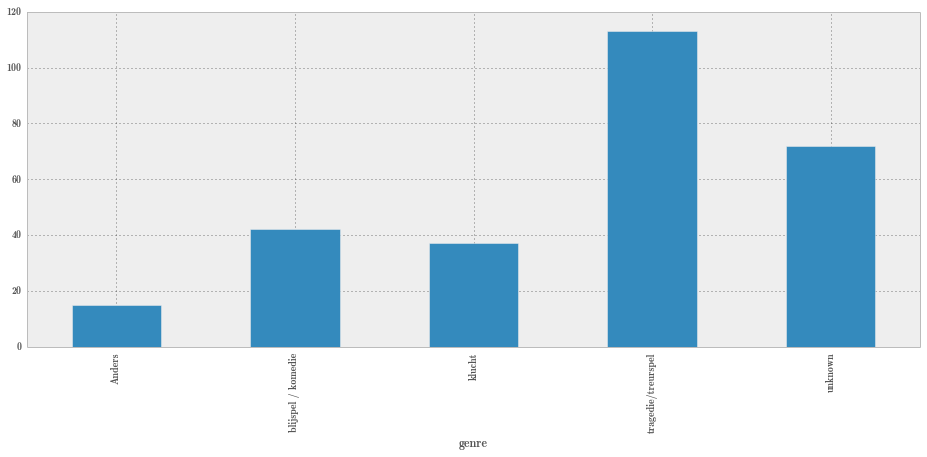

In [15]:
# number of texts per genre and period
print 'Number of texts per genre'
genres = complete.groupby('genre')
genres.size().plot(kind='bar')
print genres.size()

Number of texts per period
period
classicism        99
enlightenment    123
renaissance       57
dtype: int64


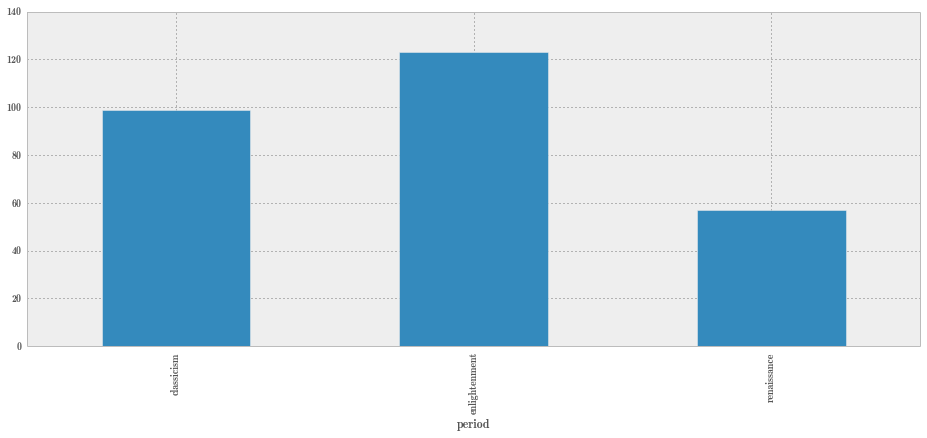

In [16]:
print 'Number of texts per period'
periods = complete.groupby('period')
periods.size().plot(kind='bar')
print periods.size()


Number of texts per period
genre          Anders  blijspel / komedie  klucht  tragedie/treurspel  unknown
period                                                                        
renaissance         6                   7       8                  36        0
classicism          5                  28      21                  45        0
enlightenment       4                   7       8                  32       72


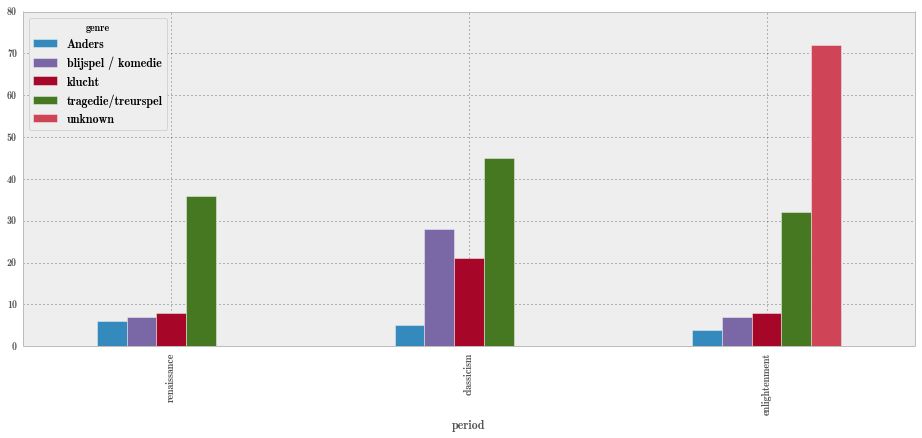

In [17]:
print 'Number of texts per period'
df = pd.DataFrame({'count' : complete.groupby(['period', 'genre']).size()}).reset_index()
df = df.pivot(index='period', columns='genre', values='count')
df = df.fillna(0)
df = df.reindex(['renaissance', 'classicism', 'enlightenment'])
print df
df.plot(kind='bar')

Number of texts per year
Number of years for which 0 texts are available: 0


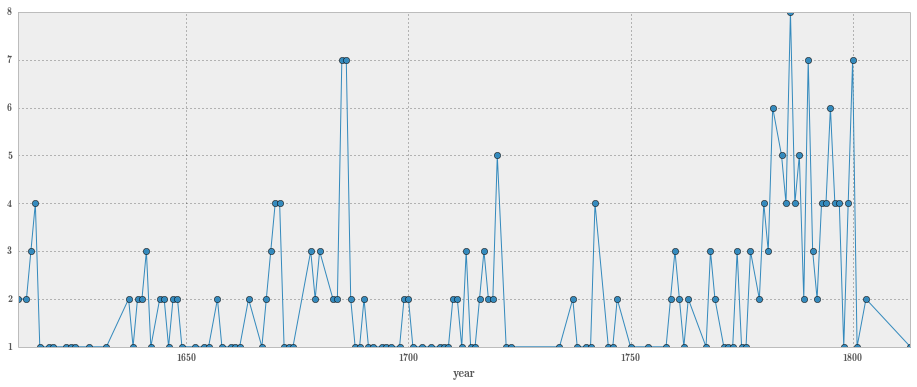

In [18]:
print 'Number of texts per year'
years = complete.groupby('year')
#print years.size()
print 'Number of years for which 0 texts are available:', np.sum(years.size() == 0)
years.size().plot(marker='o')

Number of texts per genre per year


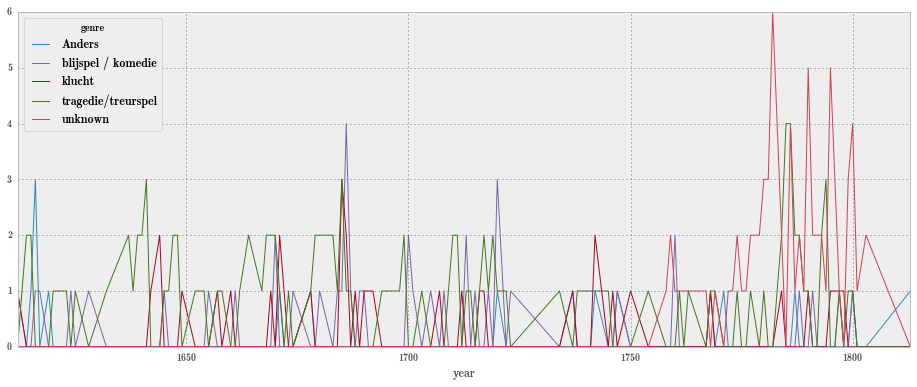

In [19]:
print 'Number of texts per genre per year'
year2genre = pd.DataFrame({'count' : complete.groupby(['year', 'genre']).size()}).reset_index()
year2genre = year2genre.pivot(index='year', columns='genre', values='count')
year2genre = year2genre.fillna(0)
#print year2genre
year2genre.plot()

#Compare the fraction of emotional sentences per text

For the different corpora.
An emotional sentence is a sentence for which at least one HEEM label is predicted.

/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1246: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=x-large. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)


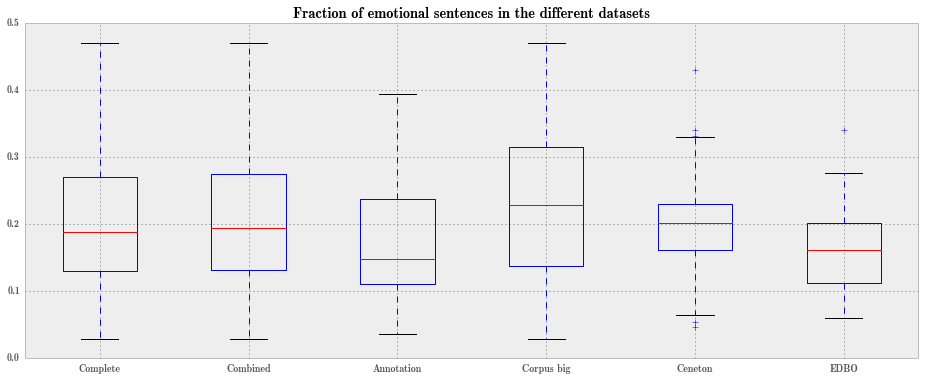

In [20]:
complete.loc[:, 'frac_emotional'] = complete.apply(lambda row: (row['#emotional']+0.0)/row['#lines'], axis=1)
combined.loc[:, 'frac_emotional'] = combined.apply(lambda row: (row['#emotional']+0.0)/row['#lines'], axis=1)
annotation.loc[:, 'frac_emotional'] = annotation.apply(lambda row: (row['#emotional']+0.0)/row['#lines'], axis=1)
corpus_big.loc[:, 'frac_emotional'] = corpus_big.apply(lambda row: (row['#emotional']+0.0)/row['#lines'], axis=1)
ceneton.loc[:, 'frac_emotional'] = ceneton.apply(lambda row: (row['#emotional']+0.0)/row['#lines'], axis=1)
edbo.loc[:, 'frac_emotional'] = edbo.apply(lambda row: (row['#emotional']+0.0)/row['#lines'], axis=1)

data = [complete['frac_emotional'], combined['frac_emotional'], annotation['frac_emotional'], corpus_big['frac_emotional'], ceneton['frac_emotional'], edbo['frac_emotional']]
plt.boxplot(data)
plt.xticks([1,2,3,4,5,6],['Complete', 'Combined', 'Annotation', 'Corpus big','Ceneton','EDBO'])
plt.title('Fraction of emotional sentences in the different datasets');

In [21]:
from scipy import stats
import statsmodels.api as sm

f_val, p_val = stats.f_oneway(annotation['frac_emotional'], corpus_big['frac_emotional'], ceneton['frac_emotional'], edbo['frac_emotional'])
print "P value ANOVA: {:10.10f}\n".format(p_val)

annotation.loc[:, 'corpus'] = annotation.apply(lambda row: 'annotation', axis=1)
corpus_big.loc[:, 'corpus'] = corpus_big.apply(lambda row: 'corpus_big', axis=1)
ceneton.loc[:, 'corpus'] = ceneton.apply(lambda row: 'ceneton', axis=1)
edbo.loc[:, 'corpus'] = edbo.apply(lambda row: 'edbo', axis=1)

df = pd.concat([annotation, corpus_big, ceneton, edbo])

result = sm.stats.multicomp.pairwise_tukeyhsd(df.frac_emotional, df.corpus)
print(result.summary())

P value ANOVA: 0.0000146696

  Multiple Comparison of Means - Tukey HSD,FWER=0.05 
  group1     group2   meandiff  lower   upper  reject
-----------------------------------------------------
annotation  ceneton    0.0211  -0.0394  0.0815 False 
annotation corpus_big  0.0476  -0.0009  0.0962 False 
annotation    edbo    -0.0191  -0.0722  0.0341 False 
 ceneton   corpus_big  0.0266  -0.0189  0.072  False 
 ceneton      edbo    -0.0401  -0.0905  0.0102 False 
corpus_big    edbo    -0.0667  -0.1019 -0.0315  True 
-----------------------------------------------------


# Compare the number of lines per text

For the different corpora.

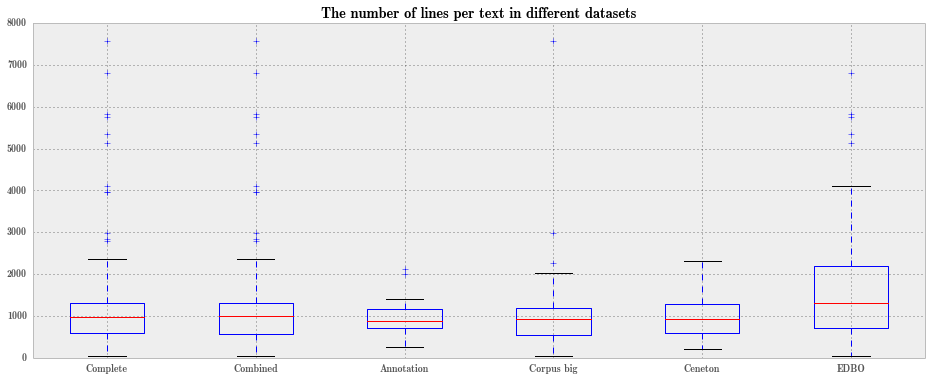

In [22]:
data = [complete['#lines'], combined['#lines'], annotation['#lines'], corpus_big['#lines'], ceneton['#lines'], edbo['#lines']]
plt.boxplot(data)
plt.xticks([1,2,3,4,5,6],['Complete', 'Combined', 'Annotation', 'Corpus big','Ceneton','EDBO'])
plt.title('The number of lines per text in different datasets');

In [23]:
f_val, p_val = stats.f_oneway(annotation['#lines'], corpus_big['#lines'], ceneton['#lines'], edbo['#lines'])
print "P value ANOVA: {:10.10f}\n".format(p_val)

result = sm.stats.multicomp.pairwise_tukeyhsd(df.get('#lines'), df.corpus)
print(result.summary())

P value ANOVA: 0.0000000876

    Multiple Comparison of Means - Tukey HSD,FWER=0.05   
  group1     group2   meandiff   lower     upper   reject
---------------------------------------------------------
annotation  ceneton   23.2586  -580.3622  626.8794 False 
annotation corpus_big -36.7984  -521.473  447.8761 False 
annotation    edbo    774.8183  244.0175 1305.6191  True 
 ceneton   corpus_big -60.057  -513.9206  393.8065 False 
 ceneton      edbo    751.5597  248.7355 1254.3839  True 
corpus_big    edbo    811.6167  460.3567 1162.8768  True 
---------------------------------------------------------


# Compare the average number of labels per sentence

For the different corpora

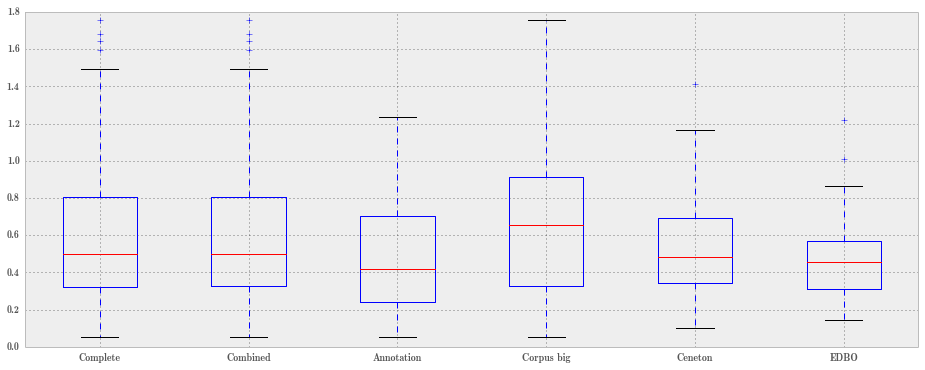

In [24]:
data = [complete['avg_labels'], combined['avg_labels'], annotation['avg_labels'], corpus_big['avg_labels'], ceneton['avg_labels'], edbo['avg_labels']]
plt.boxplot(data)
plt.xticks([1,2,3,4,5,6],['Complete', 'Combined', 'Annotation', 'Corpus big','Ceneton','EDBO']);

In [25]:
f_val, p_val = stats.f_oneway(complete['avg_labels'], combined['avg_labels'], annotation['avg_labels'], corpus_big['avg_labels'], ceneton['avg_labels'], edbo['avg_labels'])
print "P value ANOVA: {:10.10f}\n".format(p_val)

result = sm.stats.multicomp.pairwise_tukeyhsd(df.get('avg_labels'), df.corpus)
print(result.summary())

P value ANOVA: 0.0104793696

  Multiple Comparison of Means - Tukey HSD,FWER=0.05 
  group1     group2   meandiff  lower   upper  reject
-----------------------------------------------------
annotation  ceneton    0.0151  -0.2003  0.2305 False 
annotation corpus_big  0.135   -0.0379  0.308  False 
annotation    edbo    -0.0405  -0.2299  0.1489 False 
 ceneton   corpus_big  0.1199   -0.042  0.2819 False 
 ceneton      edbo    -0.0556   -0.235  0.1238 False 
corpus_big    edbo    -0.1755  -0.3008 -0.0502  True 
-----------------------------------------------------


# Compare the number of emotional sentences per text

For the different corpora.

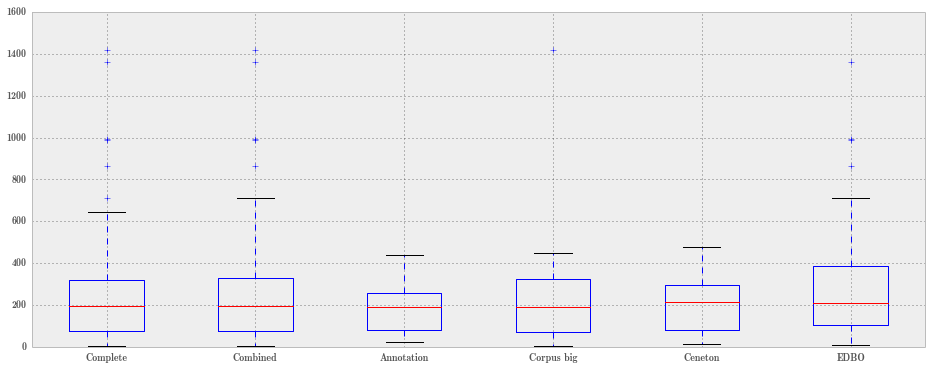

In [26]:
data = [complete['#emotional'], combined['#emotional'], annotation['#emotional'], corpus_big['#emotional'], ceneton['#emotional'], edbo['#emotional']]
plt.boxplot(data)
plt.xticks([1,2,3,4,5,6],['Complete', 'Combined', 'Annotation', 'Corpus big','Ceneton','EDBO']);

In [27]:
f_val, p_val = stats.f_oneway(annotation['#emotional'], corpus_big['#emotional'], ceneton['#emotional'], edbo['#emotional'])
print "P value ANOVA: {:10.10f}\n".format(p_val)

result = sm.stats.multicomp.pairwise_tukeyhsd(df.get('avg_labels'), df.corpus)
print(result.summary())

P value ANOVA: 0.0391246458

  Multiple Comparison of Means - Tukey HSD,FWER=0.05 
  group1     group2   meandiff  lower   upper  reject
-----------------------------------------------------
annotation  ceneton    0.0151  -0.2003  0.2305 False 
annotation corpus_big  0.135   -0.0379  0.308  False 
annotation    edbo    -0.0405  -0.2299  0.1489 False 
 ceneton   corpus_big  0.1199   -0.042  0.2819 False 
 ceneton      edbo    -0.0556   -0.235  0.1238 False 
corpus_big    edbo    -0.1755  -0.3008 -0.0502  True 
-----------------------------------------------------


In [28]:
# Save datasets to file (for easy loading)
annotation.to_csv('/home/jvdzwaan/data/tmp/annotation.csv')
corpus_big.to_csv('/home/jvdzwaan/data/tmp/corpus_big.csv')
ceneton.to_csv('/home/jvdzwaan/data/tmp/ceneton.csv')
edbo.to_csv('/home/jvdzwaan/data/tmp/edbo.csv')
combined.to_csv('/home/jvdzwaan/data/tmp/combined.csv')
complete.to_csv('/home/jvdzwaan/data/tmp/complete.csv')